## Задача  
Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных   предприятий.    
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.  
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.  
Вам нужно:  
Подготовить данные;  
Провести исследовательский анализ данных;  
Построить и обучить модель.  
Чтобы выполнить проект, обращайтесь к библиотекам pandas, matplotlib и sklearn. Вам поможет их документация.  
Следующий урок посвящён технологическому процессу очистки руды. Решите сами, какие детали нужны для построения модели, а какие — нет.  

## Этап 1: Подготовка данных, проверка правильности рассчёта эффективности обогащения, анализ признаков 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full_data = pd.read_csv('/datasets/gold_recovery_full.csv', index_col = 'date')
train_data = pd.read_csv('/datasets/gold_recovery_train.csv', index_col = 'date')
test_data = pd.read_csv('/datasets/gold_recovery_test.csv', index_col = 'date')

In [3]:
full_data.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                             

In [5]:
def recovery_result (c, f, t):
    result = (c * (f - t) / (f*(c - t))) * 100
    return result

In [6]:
c_val = train_data['rougher.output.concentrate_au'] 
f_val = train_data['rougher.input.feed_au'] 
t_val = train_data['rougher.output.tail_au']

rougher_output_recovery_calculated = recovery_result(c_val, f_val, t_val)
rougher_output_recovery_calculated = rougher_output_recovery_calculated.dropna()
rougher_output_recovery_calculated.isnull().sum()


0

In [7]:
from sklearn.metrics import mean_absolute_error

In [8]:
real_rought_output_recovery = full_data['rougher.output.recovery']
real_rought_output_recovery = real_rought_output_recovery[rougher_output_recovery_calculated.index]
real_rought_output_recovery = real_rought_output_recovery.dropna()
rougher_output_recovery_calculated = rougher_output_recovery_calculated[real_rought_output_recovery.index]

In [9]:
real_rought_output_recovery

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: rougher.output.recovery, Length: 14287, dtype: float64

In [10]:
rougher_output_recovery_calculated


date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Length: 14287, dtype: float64

In [11]:
mae = mean_absolute_error(real_rought_output_recovery, rougher_output_recovery_calculated)
print('Значение MAE:', mae)

Значение MAE: 9.463293326830816e-15


In [12]:
test_column_names = list(test_data.columns)
full_column_names = list(full_data.columns)
missing_features = []

In [13]:
for i in full_column_names:
    if i not in test_column_names:
        missing_features.append(i)

missing_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

### Выводы
Для расчёта эффективности обогащения была написана функция по формуле из методички.  
Обратил внимание, что индексы датафреймов в выборках отличались, поэтому индексным столбцом был выбран date.  
Удалены строки с NaN.  
Проведён рассчёт rougher.output.recovery по данным обучающей выборки.  
Результаты сравнены с реальными данными из таблицы с полными данными.  
Проведён рассчёт MAE. Показатель оказался близким к нулю, что говорит о правильности рассчёта эффективности обогащения.  
Параметры, недоступные в тестовой выборке относятся к типам: параметр продукта (output) и рассчётные (calculation)  
Эти параметры появляются по мере прохождения технологической цепочки и описывают постепенное изменение основных метрик.    
В конечном итоге из этих параметров можно высчитать эффективность добычи.  



In [14]:
full_data['rougher.output.recovery'].isnull().sum()

3119

In [15]:
c_val_full = full_data['rougher.output.concentrate_au'] 
f_val_full = full_data['rougher.input.feed_au'] 
t_val_full = full_data['rougher.output.tail_au']

full_data['rougher.output.recovery'] = recovery_result(c_val_full, f_val_full, t_val_full)
full_data['rougher.output.recovery'].isnull().sum()

2776

In [16]:
fd_columns_list_without_target = ['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
        'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au',
       'rougher.output.tail_ag', 'rougher.output.tail_pb',
       'rougher.output.tail_sol', 'rougher.output.tail_au',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level',
       'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb',
       'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_au',
       'secondary_cleaner.state.floatbank2_a_air',
       'secondary_cleaner.state.floatbank2_a_level',
       'secondary_cleaner.state.floatbank2_b_air',
       'secondary_cleaner.state.floatbank2_b_level',
       'secondary_cleaner.state.floatbank3_a_air',
       'secondary_cleaner.state.floatbank3_a_level',
       'secondary_cleaner.state.floatbank3_b_air',
       'secondary_cleaner.state.floatbank3_b_level',
       'secondary_cleaner.state.floatbank4_a_air',
       'secondary_cleaner.state.floatbank4_a_level',
       'secondary_cleaner.state.floatbank4_b_air',
       'secondary_cleaner.state.floatbank4_b_level',
       'secondary_cleaner.state.floatbank5_a_air',
       'secondary_cleaner.state.floatbank5_a_level',
       'secondary_cleaner.state.floatbank5_b_air',
       'secondary_cleaner.state.floatbank5_b_level',
       'secondary_cleaner.state.floatbank6_a_air',
       'secondary_cleaner.state.floatbank6_a_level']

full_data_without_targets = full_data[fd_columns_list_without_target]
    
full_data_without_targets = full_data_without_targets.fillna(method = 'ffill')

full_data[fd_columns_list_without_target] = full_data_without_targets

In [17]:
test_data.isnull().sum()
train_data.isnull().sum()
full_data.isnull().sum()

final.output.concentrate_ag                      0
final.output.concentrate_pb                      0
final.output.concentrate_sol                     0
final.output.concentrate_au                      0
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level       0
secondary_cleaner.state.floatbank5_b_air         0
secondary_cleaner.state.floatbank5_b_level       0
secondary_cleaner.state.floatbank6_a_air         0
secondary_cleaner.state.floatbank6_a_level       0
Length: 86, dtype: int64

In [18]:
def data_overfill (full, recovering_data):
    columns = list(recovering_data.columns)
    changed_full = full[columns]
    result = changed_full.loc[recovering_data.index]
    return result

In [19]:
test_data = data_overfill(full_data, test_data)
test_data.isnull().sum().sum()

0

In [20]:
train_data = data_overfill(full_data, train_data)
train_data.isnull().sum().sum()

3804

In [21]:
def filled_target_features (full, recovering_data):
    recovering_data = pd.DataFrame(recovering_data)
    full = full.loc[recovering_data.index]
    return full

In [22]:
def filled_target_features_for_test (full, recovering_data):
    recovering_data = pd.DataFrame(recovering_data)
    full = full.loc[recovering_data.index]
    recovering_data [['rougher.output.recovery', 'final.output.recovery']] = full[['rougher.output.recovery', 'final.output.recovery']]
    return recovering_data

In [23]:
test_data = filled_target_features_for_test(full_data, test_data)
train_data = filled_target_features_for_test(full_data, train_data)

In [24]:
test_data.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)
test_data[['rougher.output.recovery', 'final.output.recovery']].isnull().sum().sum()

0

In [25]:
train_data.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)
train_data[['rougher.output.recovery', 'final.output.recovery']].isnull().sum().sum()

0

In [26]:
train_data.isnull().sum().sum()

0

In [27]:
test_data.isnull().sum().sum()

0

### Выводы по предобработке
Предобработка данных проходила следующими этапами:  
1) с помощью уже написанной функции рассчитал (где возможно) параметр 'rougher.output.recovery'.  
2) были заполнены все проспуски в столбцах фрейма full_data (за исключением целевых признаков 'rougher.output.recovery', 'final.output.recovery') методом fillna('ffill').  
3) была написана функция, которая меняет данные тестовой или тренировочной выборки на данные из полного датафрейма без добавления новых признаков.  
4) в тестовую и тренировочную выборки были подтянуты данные целевых признаков 'rougher.output.recovery', 'final.output.recovery' из полного датафрейма.  
5) в тестовой и тренировочной выборках были дропнуты строки с пропусками в целевых признаках.  

## Этап 2: Анализ данных

**Отслеживание динамики изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки**


In [28]:
au_concentration_columns = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag_concentration_columns = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb_concentration_columns = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5e3550>,
      dtype=object)

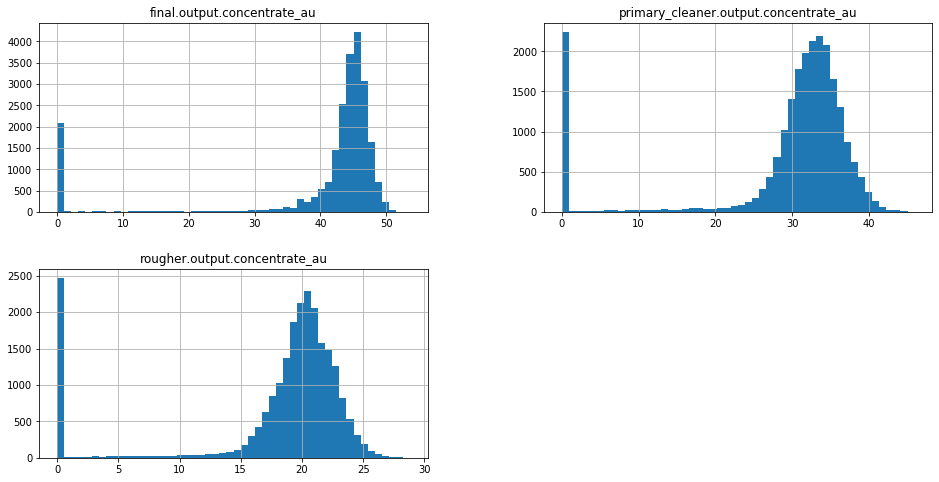

In [29]:
full_data[au_concentration_columns].hist(bins = 50, figsize = (16,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120ffa490>,
      dtype=object)

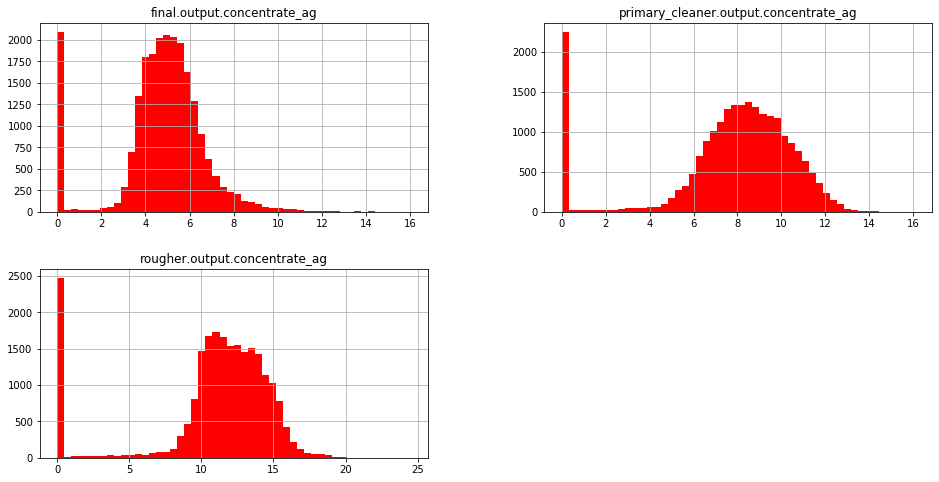

In [30]:
full_data[ag_concentration_columns].hist(bins = 50, color = 'r', figsize = (16,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24e65710>,
      dtype=object)

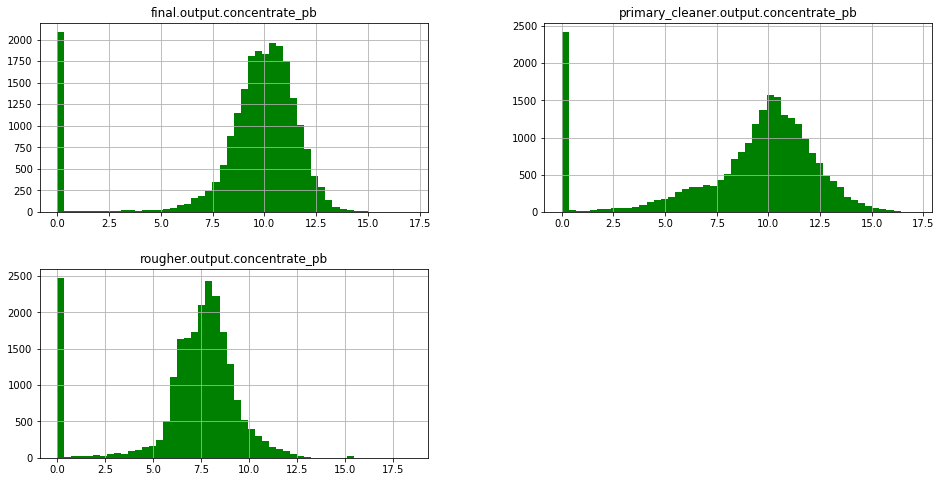

In [31]:
full_data[pb_concentration_columns].hist(bins = 50, color = 'g', figsize = (16,8))


### Выводы  
Концентрация золота устойчивости растёт по мере новых этапов очистки.  
Концентрация серебра устойчивости снижается по мере новых этапов очистки.  
Концентрация свинца растёт только после первого этапа. Последующие очистки не повышают концентрацию.  

**Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках.**


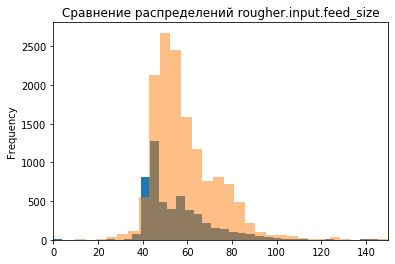

In [32]:
#rougher.input.feed_size
#primary_cleaner.input.feed_size
#rougher.input.feed_size

test_data['rougher.input.feed_size'].plot(kind='hist', bins = 100)
train_data['rougher.input.feed_size'].plot(kind='hist', bins = 100, alpha = 0.5)
plt.xlim(0,150)
plt.title('Сравнение распределений rougher.input.feed_size')
plt.show()

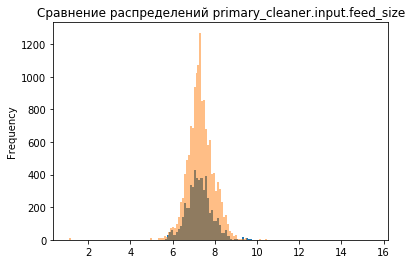

In [33]:
test_data['primary_cleaner.input.feed_size'].plot(kind='hist', bins = 100)
train_data['primary_cleaner.input.feed_size'].plot(kind='hist', bins = 100, alpha = 0.5)
plt.xlim()
plt.title('Сравнение распределений primary_cleaner.input.feed_size')
plt.show()

### Выводы
Распределения не имеют существенных различий.

**Исследование суммарной концентрации всех веществ на разных стадиях, поиск и удаление аномалий.**  

In [34]:
def conc_data_filling (full, recovering_data):
    recovering_data = pd.DataFrame(recovering_data)
    full = full.loc[recovering_data.index]
    recovering_data[[
        'final.output.concentrate_au', 'final.output.concentrate_ag',
        'final.output.concentrate_pb', 'final.output.concentrate_sol',
        'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
        'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']] = full[['final.output.concentrate_au', 'final.output.concentrate_ag',
        'final.output.concentrate_pb', 'final.output.concentrate_sol',
        'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol',
        'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']]
    return recovering_data

In [35]:
final_concentrate_columns = [
    'final.output.concentrate_au', 'final.output.concentrate_ag',
    'final.output.concentrate_pb', 'final.output.concentrate_sol']
primary_concentrate_columns = [
    'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag',
    'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol']
rought_concentrate_columns = [
    'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
    'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol']


In [36]:
test_data_conc = conc_data_filling(full_data, test_data)
train_data_conc = conc_data_filling(full_data, train_data)

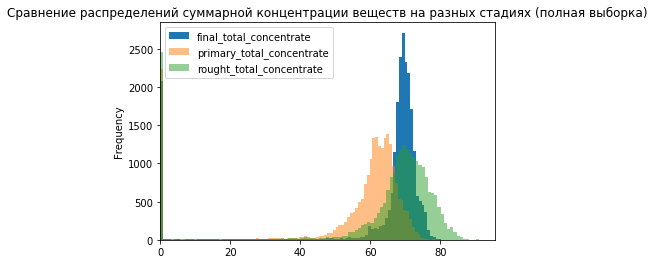

In [37]:
sum_concentradte_data = full_data
sum_concentradte_data['final_total_concentrate'] = sum_concentradte_data[final_concentrate_columns].sum(axis =1)
sum_concentradte_data['primary_total_concentrate'] = sum_concentradte_data[primary_concentrate_columns].sum(axis =1)
sum_concentradte_data['rought_total_concentrate'] = sum_concentradte_data[rought_concentrate_columns].sum(axis =1)

sum_concentradte_data['final_total_concentrate'].plot(kind='hist', bins = 100, legend = True)
sum_concentradte_data['primary_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
sum_concentradte_data['rought_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
plt.xlim(0)
plt.title('Сравнение распределений суммарной концентрации веществ на разных стадиях (полная выборка)')
plt.show()

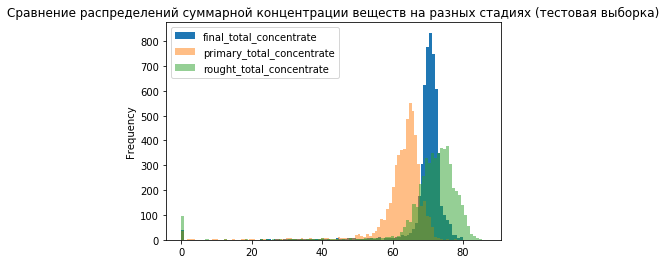

In [38]:
sum_concentradte_test_data = test_data_conc
sum_concentradte_test_data['final_total_concentrate'] = sum_concentradte_test_data[final_concentrate_columns].sum(axis =1)
sum_concentradte_test_data['primary_total_concentrate'] = sum_concentradte_test_data[primary_concentrate_columns].sum(axis =1)
sum_concentradte_test_data['rought_total_concentrate'] = sum_concentradte_test_data[rought_concentrate_columns].sum(axis =1)

sum_concentradte_test_data['final_total_concentrate'].plot(kind='hist', bins = 100, legend = True)
sum_concentradte_test_data['primary_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
sum_concentradte_test_data['rought_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
plt.xlim()
plt.title('Сравнение распределений суммарной концентрации веществ на разных стадиях (тестовая выборка)')
plt.show()

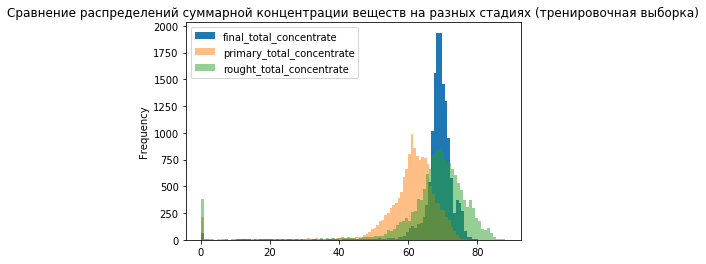

In [39]:
sum_concentradte_train_data = train_data_conc
sum_concentradte_train_data['final_total_concentrate'] = sum_concentradte_train_data[final_concentrate_columns].sum(axis =1)
sum_concentradte_train_data['primary_total_concentrate'] = sum_concentradte_train_data[primary_concentrate_columns].sum(axis =1)
sum_concentradte_train_data['rought_total_concentrate'] = sum_concentradte_train_data[rought_concentrate_columns].sum(axis =1)

sum_concentradte_train_data['final_total_concentrate'].plot(kind='hist', bins = 100, legend = True)
sum_concentradte_train_data['primary_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
sum_concentradte_train_data['rought_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
plt.xlim()
plt.title('Сравнение распределений суммарной концентрации веществ на разных стадиях (тренировочная выборка)')
plt.show()

### Выводы
Распределения суммарной концентрации веществ в сырье на тестовой выборке имеет отличия от остальных выборок.  
В ней преобладает показатель около 75, тогда как в полном датасете и тренировочной выборке максимум значений распределены в районе 70.  
Также отмечаю, что на тренировочной выборке максимум primary_total_concentrate находится околоо 60,  
в отличие от полной и тестовой выборок.  
Полагаю необходимым сократить количество количество записей, отвечающих критерию аномальности, в обоих датафреймах.  

### (UPD)

Аномалия на значении 0. Лучше исключить эти данные их выборок.  

In [40]:
sum_concentradte_test_data = sum_concentradte_test_data.query(
    'rought_total_concentrate > 0 & final_total_concentrate > 0 & primary_total_concentrate > 0')

In [41]:
sum_concentradte_train_data = sum_concentradte_train_data.query(
    'rought_total_concentrate > 0.9 & final_total_concentrate > 0.9 & primary_total_concentrate > 0.9')

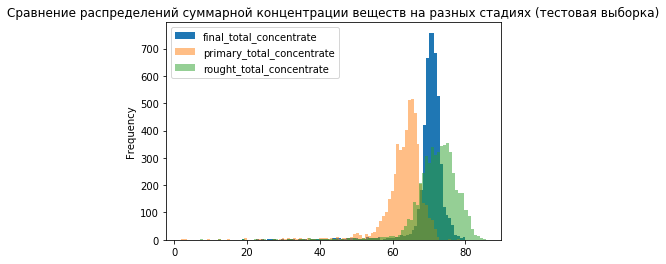

In [42]:
sum_concentradte_test_data['final_total_concentrate'].plot(kind='hist', bins = 100, legend = True)
sum_concentradte_test_data['primary_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
sum_concentradte_test_data['rought_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
plt.title('Сравнение распределений суммарной концентрации веществ на разных стадиях (тестовая выборка)')
plt.show()

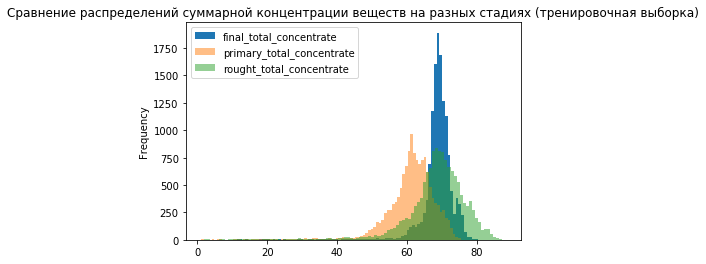

In [43]:
sum_concentradte_train_data['final_total_concentrate'].plot(kind='hist', bins = 100, legend = True)
sum_concentradte_train_data['primary_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
sum_concentradte_train_data['rought_total_concentrate'].plot(kind='hist', bins = 100, alpha = 0.5, legend = True)
plt.xlim()
plt.title('Сравнение распределений суммарной концентрации веществ на разных стадиях (тренировочная выборка)')
plt.show()

### Выводы (дополнение). 
Удалил рандомно строки, создающие дисбаланса в распределениях. 


### Выводы по 2.3.  (UPD). 
Сформированы датафреймы без нулевых значений, однако на тренировочной выборке всё же имеется хвост на значения до 0.9.  
По этой причине удалил значения до 0.9.

## Этап 3: Построение моделей, создание функции smape 

In [44]:
def smape (answers, predictions):
    result = 100/len(answers) * np.sum(2 * np.abs(
        predictions - answers) / (np.abs(answers) + np.abs(predictions)))
    return result


def final_smape (answers_rougher, predictions_rougher, answers_final, predictions_final):
    rought = 100/len(answers_rougher) * np.sum(2 * np.abs(
        predictions_rougher - answers_rougher) / (np.abs(answers_rougher) + np.abs(predictions_rougher)))
    final = 100/len(answers_final) * np.sum(2 * np.abs(
        predictions_final - answers_final) / (np.abs(answers_final) + np.abs(predictions_final)))
    
    return rought*0.25 + final*0.75

def smape_sec_ed(rought, final):
    return rought*0.25 + final*0.75

In [45]:
from sklearn.metrics import make_scorer
scorer = make_scorer(smape)


In [46]:
train_data_sample = sum_concentradte_train_data[test_data.columns]
train_data_sample = train_data_sample.dropna()
test_data = sum_concentradte_test_data[test_data.columns]
test_data = test_data.dropna()

In [47]:
train_target_rought = train_data_sample['rougher.output.recovery']
train_target_final = train_data_sample['final.output.recovery']
train_features = train_data_sample.drop(['rougher.output.recovery','final.output.recovery'], axis=1)


test_target_rought = test_data['rougher.output.recovery']
test_target_final = test_data['final.output.recovery']
test_features = test_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
numeric = ['primary_cleaner.input.sulfate',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank4_b_level',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_a_level',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank6_a_air',
 'secondary_cleaner.state.floatbank6_a_level',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol']

scaler = StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric] = scaler.transform(train_features[numeric])                           
test_features[numeric] = scaler.transform(test_features[numeric])

In [50]:
train_features_rought = train_data_sample[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size',
    'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 
    'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]

test_features_rought = test_data[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size',
    'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 
    'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
    'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]


Были подготоволены дополнительтные выборки, в которых для определения целевого параметра rought испольуется меньшее количество параметров - только те, которые имею приставку rougher.  

**Обучение модели LinearRegressin**

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_linear = LinearRegression()
model_linear.fit(train_features, train_target_rought)
model_predicted_rought = model_linear.predict(test_features)
model_predicted_final = model_linear.predict(test_features)

In [52]:
model_linear_cutted_data = LinearRegression()
model_linear_cutted_data.fit(train_features_rought, train_target_rought)
model_predicted_rought_cutted = model_linear_cutted_data.predict(test_features_rought)


In [53]:
from sklearn.model_selection import cross_val_score

rought_score_for_linear = cross_val_score(
    model_linear, train_features, train_target_rought, cv=5, scoring = scorer).mean()
rought_score_for_linear

rought_score_for_linear_cutted = cross_val_score(
    model_linear_cutted_data, train_features_rought, train_target_rought, cv=5, scoring = scorer).mean()


rought_score_for_linear, rought_score_for_linear_cutted

(135.4764933585118, 118.05520462310162)

In [54]:
final_score_for_linear = cross_val_score(
    model_linear, train_features, train_target_final, cv=5, scoring = scorer).mean()
final_score_for_linear


10.381653485347723

In [55]:
smape_linear = smape_sec_ed(rought_score_for_linear, final_score_for_linear)
print('SMAPE модели по полным данным rought:', smape_linear)

SMAPE модели по полным данным rought: 41.65536345363874


In [56]:
smape_linear_cutted = smape_sec_ed(rought_score_for_linear_cutted, final_score_for_linear)
print('SMAPE модели по сортированным данным rought:', smape_linear_cutted) 

SMAPE модели по сортированным данным rought: 37.3000412697862


In [57]:
mean_train_target_rought = pd.Series(train_target_rought.mean(), index=train_target_rought.index)
mean_train_target_final = pd.Series(train_target_final.mean(), index=train_target_final.index)

In [58]:
mean_smape_linear = final_smape(
    train_target_rought, mean_train_target_rought, train_target_final, mean_train_target_final)

print('sMAPE по средним данным:', mean_smape_linear)

sMAPE по средним данным: 12.200165021051728


#### Обучение модели Ridge regression

In [59]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.5)

rought_score_ridge_reg_rought = cross_val_score(
    ridge_reg, train_features_rought, train_target_rought, cv=5, scoring = scorer).mean()

final_score_for_reg_rought = cross_val_score(
    ridge_reg, train_features, train_target_final, cv=5, scoring = scorer).mean()
    
smape_ridge_reg = smape_sec_ed(rought_score_ridge_reg_rought, final_score_for_reg_rought)

print('sMAPE Ridge regression:', smape_ridge_reg)


sMAPE Ridge regression: 37.2962809720521


#### Support Vector Classification (Регрессия опорных векторов)

In [60]:
from sklearn import svm
svm_model = svm.SVR(C = 1)


In [61]:
rought_score_for_svm = cross_val_score(
    svm_model, train_features_rought, train_target_rought, cv=5, scoring = scorer).mean()
rought_score_for_svm

7.206194083050988

In [62]:
final_score_for_svm = cross_val_score(
    svm_model, train_features, train_target_final, cv=5, scoring = scorer).mean()
final_score_for_svm

9.20599471952042

In [63]:
smape_svm = smape_sec_ed(rought_score_for_svm, final_score_for_svm)
smape_svm

8.706044560403063

#### Обучение модели для rought по данным с дополнительным сокращение параметров    
В рамках дополнительного теста выборка подверглись ещё одному сокращению параметров.  
На этот раз я использовал только входные.


In [64]:
train_features_rought_extra_cutted = train_data_sample[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size',
    'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 
    'rougher.input.floatbank11_xanthate']]

test_features_rought_extra_cutted = test_data[[
    'rougher.input.feed_ag','rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size',
    'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 
    'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 
    'rougher.input.floatbank11_xanthate']]

In [65]:
svm_model_rought = svm.SVR()

rought_score_for_svm_cutted = cross_val_score(
    svm_model_rought, train_features_rought_extra_cutted, train_target_rought, cv=5, scoring = scorer).mean()
print('sMAPE SVM по сокращеённым параметрам:', rought_score_for_svm_cutted)

sMAPE SVM по сокращеённым параметрам: 8.163086713853103


### Подход сокращения параметров в выборках оправдал себя.

#### Дерево решений

In [66]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=12345, max_depth=16,  max_leaf_nodes= 4)

rought_score_for_dec_tree = cross_val_score(
    dec_tree, train_features_rought_extra_cutted, train_target_rought, cv=5, scoring = scorer).mean()

final_score_for_dec_tree = cross_val_score(
    dec_tree, train_features, train_target_final, cv=5, scoring = scorer).mean()

In [67]:
smape_svm_dec_tree = smape_sec_ed(rought_score_for_dec_tree, final_score_for_dec_tree)
print ('sMAPE DecisionTreeRegressor =', smape_svm_dec_tree)

sMAPE DecisionTreeRegressor = 9.120822793710847


In [68]:
for i in range(1,10,2):
    dec_tree = DecisionTreeRegressor(random_state=12345, max_depth=i,  max_leaf_nodes= 4)

    rought_score_for_dec_tree = cross_val_score(
        dec_tree, train_features_rought_extra_cutted, train_target_rought, cv=5, scoring = scorer).mean()

    final_score_for_dec_tree = cross_val_score(
        dec_tree, train_features, train_target_final, cv=5, scoring = scorer).mean()

    smape_svm_dec_tree = smape_sec_ed(rought_score_for_dec_tree, final_score_for_dec_tree)
    print('If max_depth =', i, 'sMAPE=', smape_svm_dec_tree)


If max_depth = 1 sMAPE= 9.347821083151258
If max_depth = 3 sMAPE= 9.120822793710847
If max_depth = 5 sMAPE= 9.120822793710847
If max_depth = 7 sMAPE= 9.120822793710847
If max_depth = 9 sMAPE= 9.120822793710847


In [69]:
from sklearn.ensemble import RandomForestRegressor

for i in range(1,10):
    rand_for = RandomForestRegressor(random_state=12345, n_estimators=i, max_depth=10,  max_leaf_nodes= 4)

    rought_score_for_rand_for = cross_val_score(
        rand_for, train_features_rought_extra_cutted, train_target_rought, cv=5, scoring = scorer).mean()

    final_score_for_rand_for = cross_val_score(
        rand_for, train_features, train_target_final, cv=5, scoring = scorer).mean()

    smape_rand_for = smape_sec_ed(rought_score_for_rand_for, final_score_for_rand_for)
    print('If n_estimators =', i, 'sMAPE=', smape_rand_for)

If n_estimators = 1 sMAPE= 9.091489602411329
If n_estimators = 2 sMAPE= 8.846007142398067
If n_estimators = 3 sMAPE= 8.85638978845935
If n_estimators = 4 sMAPE= 8.860306410195651
If n_estimators = 5 sMAPE= 8.888423032785157
If n_estimators = 6 sMAPE= 8.891927993349453
If n_estimators = 7 sMAPE= 8.881758145844545
If n_estimators = 8 sMAPE= 8.909295933966622
If n_estimators = 9 sMAPE= 8.914325602052235


#### Проверка работы модели на тестовой выборке

In [70]:
svm_rought = svm_model_rought.fit(train_features_rought_extra_cutted, train_target_rought)
svm_final = svm_model.fit(train_features, train_target_final)

svm_model_predict_rought = svm_rought.predict(test_features_rought_extra_cutted)
svm_model_predict_final = svm_final.predict(test_features)

In [71]:
smape_svm_test = final_smape(test_target_rought, svm_model_predict_rought, test_target_final, svm_model_predict_final)
smape_svm_test

print ('sMAPE Support Vector Classification по тестовм данным:', smape_svm_test)
print('sMAPE по средним данным:', mean_smape_linear)

sMAPE Support Vector Classification по тестовм данным: 7.136975484777424
sMAPE по средним данным: 12.200165021051728


## Выводы. 
Количество признаков тренировочной выборки было приведено в соответствие с тестовой выборкой. 
В тестовом и тренировочном датафреймах были очищены от аномалий.   
В соответствии с указаниями, были написаны функции расчёта smape и финального smape.  
Функция smape была сделана метрикой make_scorer и использовалась для кросс-валидации.  
Для тестирования были выбраны две модели. Классическая Линейная регрессия и Модель регрессии опорных векторов.  
Модель регрессии опорных векторов показала лучший средний результат после проведённой кросс-валидации.  
Также модель опорных векторов опередила по sMAPE выборку из средних значений.  
Однако исследования по тестовой выборке показала, что эффективность модели опорных векторов ниже,  
чем предсказания по средним.  
Эффективность SupportVectorClassification в данном конкретном случае не подтверждена.

## Работа над ошибками № 2  
После консультации с коллегами я понял, что сравнивать результат работы модели на тестовых данных со средним значением
тестовых данных - неправильно. Сравнение должно было проводиться со средним значением тренировочной выборки.  
До того момента, как я это понял, мною были проведены следующие мероприятия:  
1) скалировал параметры выборок.  Это сразу позволило немного улучшить результаты моей наиболее эффективной модели (Support Vector Classification).  
2) поработал испольщование других моделей, но их результаты не были лучше, чем у SVC.  
3) решил лучше подготовить данные для обучения модели для анализа результатов предобработки сырья.  
Руководствуясь логикой я удалил все параметры, которые не касаются этапа Rought. Это значительно улучшило показатели метрик.  
4) Затем я пошёл дальше и в выбьорках оставил только те признаки, которые имеют Rought и Input. То есть только те данные, которые  известны непосрдественно перед флотацией.  
5) Полученные результаты работы оказались лучше, чем средние по выборке. Модель можно брать в работу.  
